In [34]:
import pybullet as p
import numpy as np

from pybullet_robot import PyBulletRobot, W, H

import sys, glob
import pandas as pd 

import matplotlib.pyplot as plt

In [35]:
def plot_fh(history):
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

In [2]:
gui = True
r = PyBulletRobot(3, 1, render=gui)

*** Initializing PyBulletRobot(ns=3, render=True) ...
*** Initializing PyBulletRobot() done


In [36]:
# load csv
fnames = "goodphis-*.csv"
phiss = None
for fname in glob.glob(fnames):
    df = pd.read_csv(fname)
    if phiss is None:
        phiss = df
    else:
        phiss = pd.concat([phiss, df])
phiss = phiss.values[1:,1:]
print(phiss.shape)

(1000, 6)


In [ ]:
for i in range(6):
    plt.hist(phiss[:,i])
    plt.show()

In [17]:
X = np.zeros((phiss.shape[0], 9))
Y = np.zeros(phiss.shape)

for i in range(phiss.shape[0]):
    phis = phiss[i]
    r.step(phis.reshape(-1, 2))
    cam_p, cam_v, cam_u = r.getHeadcamPVU()
    Y[i] = phis
    X[i] = list(cam_p) + list(cam_v) + list(cam_u)
print(X.shape)
print(Y.shape)

(1000, 9)
(1000, 6)


In [27]:
import tensorflow as tf

def mk_model():
    inputs = tf.keras.Input(shape=(9,))
    
    layer1 = tf.keras.layers.Dense(32, activation='tanh')(inputs)
    layer2 = tf.keras.layers.Dense(16, activation='tanh')(layer1)
    outputs = tf.keras.layers.Dense(6, activation='tanh')(layer2)

    model = tf.keras.Model(inputs, outputs)
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

    return model

model = mk_model()

print(model.summary())

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 9)]               0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                320       
_________________________________________________________________
dense_11 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 102       
Total params: 950
Trainable params: 950
Non-trainable params: 0
_________________________________________________________________
None


Train on 980 samples, validate on 20 samples
Epoch 1/250
980/980 [==============================] - 0s 93us/sample - loss: 2.7275e-04 - mean_absolute_error: 0.0120 - val_loss: 3.6943e-04 - val_mean_absolute_error: 0.0137
Epoch 2/250
980/980 [==============================] - 0s 89us/sample - loss: 2.9620e-04 - mean_absolute_error: 0.0125 - val_loss: 3.3427e-04 - val_mean_absolute_error: 0.0133
Epoch 3/250
980/980 [==============================] - 0s 85us/sample - loss: 2.5986e-04 - mean_absolute_error: 0.0115 - val_loss: 4.0669e-04 - val_mean_absolute_error: 0.0142
Epoch 4/250
980/980 [==============================] - 0s 81us/sample - loss: 2.6248e-04 - mean_absolute_error: 0.0116 - val_loss: 3.4020e-04 - val_mean_absolute_error: 0.0134
Epoch 5/250
980/980 [==============================] - 0s 89us/sample - loss: 2.8931e-04 - mean_absolute_error: 0.0124 - val_loss: 3.3168e-04 - val_mean_absolute_error: 0.0133
Epoch 6/250
980/980 [==============================] - 0s 85us/sample - los

980/980 [==============================] - 0s 91us/sample - loss: 3.0611e-04 - mean_absolute_error: 0.0127 - val_loss: 3.3147e-04 - val_mean_absolute_error: 0.0138
Epoch 48/250
980/980 [==============================] - 0s 84us/sample - loss: 2.6499e-04 - mean_absolute_error: 0.0117 - val_loss: 3.2291e-04 - val_mean_absolute_error: 0.0130
Epoch 49/250
980/980 [==============================] - 0s 83us/sample - loss: 2.4640e-04 - mean_absolute_error: 0.0112 - val_loss: 3.4016e-04 - val_mean_absolute_error: 0.0131
Epoch 50/250
980/980 [==============================] - 0s 84us/sample - loss: 2.7191e-04 - mean_absolute_error: 0.0118 - val_loss: 3.3557e-04 - val_mean_absolute_error: 0.0133
Epoch 51/250
980/980 [==============================] - 0s 83us/sample - loss: 2.6894e-04 - mean_absolute_error: 0.0118 - val_loss: 4.0332e-04 - val_mean_absolute_error: 0.0142
Epoch 52/250
980/980 [==============================] - 0s 89us/sample - loss: 2.6834e-04 - mean_absolute_error: 0.0118 - val_lo

980/980 [==============================] - 0s 83us/sample - loss: 2.4408e-04 - mean_absolute_error: 0.0111 - val_loss: 3.9035e-04 - val_mean_absolute_error: 0.0150
Epoch 94/250
980/980 [==============================] - 0s 81us/sample - loss: 2.5500e-04 - mean_absolute_error: 0.0116 - val_loss: 3.5734e-04 - val_mean_absolute_error: 0.0137
Epoch 95/250
980/980 [==============================] - 0s 85us/sample - loss: 2.5005e-04 - mean_absolute_error: 0.0114 - val_loss: 3.4952e-04 - val_mean_absolute_error: 0.0143
Epoch 96/250
980/980 [==============================] - 0s 84us/sample - loss: 2.7421e-04 - mean_absolute_error: 0.0119 - val_loss: 3.5542e-04 - val_mean_absolute_error: 0.0134
Epoch 97/250
980/980 [==============================] - 0s 83us/sample - loss: 2.8207e-04 - mean_absolute_error: 0.0121 - val_loss: 3.7397e-04 - val_mean_absolute_error: 0.0145
Epoch 98/250
980/980 [==============================] - 0s 81us/sample - loss: 2.5318e-04 - mean_absolute_error: 0.0115 - val_lo

980/980 [==============================] - 0s 88us/sample - loss: 2.6697e-04 - mean_absolute_error: 0.0119 - val_loss: 3.5752e-04 - val_mean_absolute_error: 0.0142
Epoch 140/250
980/980 [==============================] - 0s 82us/sample - loss: 3.0004e-04 - mean_absolute_error: 0.0127 - val_loss: 3.3011e-04 - val_mean_absolute_error: 0.0130
Epoch 141/250
980/980 [==============================] - 0s 87us/sample - loss: 2.7629e-04 - mean_absolute_error: 0.0121 - val_loss: 3.8366e-04 - val_mean_absolute_error: 0.0140
Epoch 142/250
980/980 [==============================] - 0s 83us/sample - loss: 2.5729e-04 - mean_absolute_error: 0.0116 - val_loss: 3.4079e-04 - val_mean_absolute_error: 0.0132
Epoch 143/250
980/980 [==============================] - 0s 82us/sample - loss: 3.1532e-04 - mean_absolute_error: 0.0129 - val_loss: 4.3627e-04 - val_mean_absolute_error: 0.0152
Epoch 144/250
980/980 [==============================] - 0s 82us/sample - loss: 2.7649e-04 - mean_absolute_error: 0.0121 - v

980/980 [==============================] - 0s 87us/sample - loss: 2.5862e-04 - mean_absolute_error: 0.0116 - val_loss: 3.0919e-04 - val_mean_absolute_error: 0.0129
Epoch 186/250
980/980 [==============================] - 0s 88us/sample - loss: 2.4269e-04 - mean_absolute_error: 0.0112 - val_loss: 3.0810e-04 - val_mean_absolute_error: 0.0129
Epoch 187/250
980/980 [==============================] - 0s 82us/sample - loss: 2.5442e-04 - mean_absolute_error: 0.0116 - val_loss: 3.7546e-04 - val_mean_absolute_error: 0.0137
Epoch 188/250
980/980 [==============================] - 0s 82us/sample - loss: 2.5837e-04 - mean_absolute_error: 0.0116 - val_loss: 3.3188e-04 - val_mean_absolute_error: 0.0128
Epoch 189/250
980/980 [==============================] - 0s 88us/sample - loss: 2.4963e-04 - mean_absolute_error: 0.0114 - val_loss: 3.1212e-04 - val_mean_absolute_error: 0.0128
Epoch 190/250
980/980 [==============================] - 0s 87us/sample - loss: 2.4106e-04 - mean_absolute_error: 0.0111 - v

980/980 [==============================] - 0s 88us/sample - loss: 2.5376e-04 - mean_absolute_error: 0.0115 - val_loss: 3.1324e-04 - val_mean_absolute_error: 0.0127
Epoch 232/250
980/980 [==============================] - 0s 88us/sample - loss: 2.3222e-04 - mean_absolute_error: 0.0109 - val_loss: 3.6234e-04 - val_mean_absolute_error: 0.0142
Epoch 233/250
980/980 [==============================] - 0s 82us/sample - loss: 2.5336e-04 - mean_absolute_error: 0.0115 - val_loss: 2.9303e-04 - val_mean_absolute_error: 0.0128
Epoch 234/250
980/980 [==============================] - 0s 82us/sample - loss: 2.5494e-04 - mean_absolute_error: 0.0114 - val_loss: 3.2716e-04 - val_mean_absolute_error: 0.0129
Epoch 235/250
980/980 [==============================] - 0s 81us/sample - loss: 2.5515e-04 - mean_absolute_error: 0.0115 - val_loss: 3.5690e-04 - val_mean_absolute_error: 0.0142
Epoch 236/250
980/980 [==============================] - 0s 87us/sample - loss: 2.7147e-04 - mean_absolute_error: 0.0120 - v

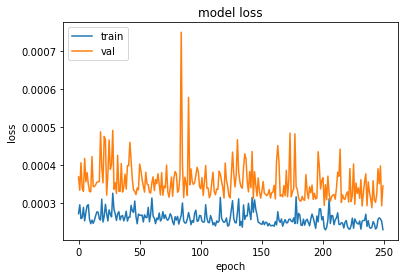

In [33]:
h = model.fit(X, Y, epochs=250, validation_split=0.02, verbose=0)
plot_fh(h)